# ENTREGABLE DEL RETO
## Constantes

$$\vec{E}=k_e \frac{q}{r^2} \hat{r}$$

$$|\vec{E}|=k_e\frac{q}{r^2}$$

$$k_e = \frac{1}{4\pi\epsilon_0}$$

$$\epsilon_0=8.8542\times 10^{-12}$$

$$\vec{E} = \frac{V}{d}$$

## Pasos:
1. Crear el campo eléctrico para una sola carga en el origen
2. Cambiar la posición de la carga
3. Agregar cargas al campo

##Autores:
1. Lourdes Badillo, A01024232
2. Martha del Río, A01023890
3. Jorge Pérez, A01023859
4. Valeria Pineda, A01023979
5. Eduardo Villalpando, A01023646


#Main

#Paso 1
##Crear espacio vectorial

Primero se define el rango en $x$ y $y$ de nuestro campo vectorial

Mediante `np.linespace()` generamos arreglos con todos los valores deseados

Mediante `np.meshgrid se generan dos matrices bidimensionales`

##Definir constantes
Para calcular el campo eléctrico, se utiliza la ley de Coulomb, mediante la fórmula

$$\vec{E}=k_e\frac{q}{r^2}\hat{r}$$

Donde $k_e$ es una constante definida por la fórmula

$$k_e=\frac{1}{4\pi\epsilon_0},  \epsilon_0 = 8.8542\times 10^-12$$

Librerías

In [ ]:
# 0 
import numpy as np
import matplotlib.pyplot as plt

# 1.1 Crear nuestro espacio en x, y
xMax = 20
xMin = -20
yMax = 20
yMin = -20
step = 41

x = np.linspace(xMin,xMax, step)
y = np.linspace(yMin,yMax, step)

X, Y = np.meshgrid(x,y)

# 1.2 Definir constantes universales
eps_0 = 8.8542*10**(-12) #e0
k_e = 1/(4*np.pi*eps_0) #Ke



#Paso 2
##Calcular campo eléctrico de una partícula

###*Constantes*
Primero obtenemos las propiedades de la partícula, que son:
* Carga $q$
* Posición: $(x_0, y_0)$

###*Radio*
En el campo vectorial entonces, el radio en cada uno de sus puntos vendrá indicado por la diferencia de sus componentes, de modo que

$$|\vec{r}|=\sqrt{(x-x_0)^2 + (y-y_0)^2}$$

Igualmente, para obtener el ángulo de cada valor del radio, se utiliza la relación trigonométrica $\arctan{\theta}$, con la función `np.arctan2(y,x)`

###*Magnitud de fuerza eléctrica*
Una vez que se conoce el radio, es posible obtener la magnitud del campo eléctrico sustituyendolo en la fórmula

###*Componentes de fuerza eléctrica*
Igualmente, conociendo la magnitud de nuestros vectores, así como sus ángulos, utilizamos las funciones $sin{\theta}$ y $cos{\theta}$ para obtener sus componentes

###*Vectores unitarios*
El vector unitario se obtiene dividiendo cada componente del vector entre su magnitud, valores que ya se conocen

###*Graficar campo eléctrico*
Con estos valores definidos, establecemos un campo vectorial en $X$ y $Y$ así como los componentes unitarios de cada uno de los puntos. 

Esto se logra mediante la función `plt.quiver(X,Y)`



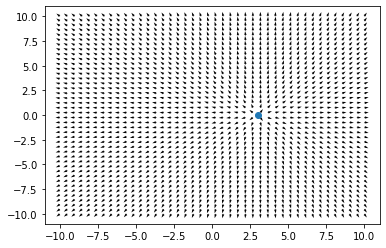

In [ ]:
#1.2 Queremos calcular el campo eléctrico 
#1.2.1 Establecemos ciertos valores para poder obtener el campo eléctrico

q = 20*10**(-6) #carga
initialX = 3
initialY = 0

#1.2.2 graficamos la partícula
plt.plot(initialX, initialY, 'o')

#1.2.3 El radio entonces será la diferencia de las coordenadas con respecto a su valor inicial
radius = np.sqrt( (X-initialX)**2 + (Y-initialY)**2 )
angles = np.arctan2(Y-initialY, X-initialX)


#1.2.4 La magnitud del campo electrico
E = k_e*(q/radius**2)


#1.2.5 Componentes
Ex = E*np.cos(angles)
Ey = E*np.sin(angles)

#1.2.6
Ex_unit = Ex/E
Ey_unit = Ey/E


plt.quiver(X,Y, Ex_unit, Ey_unit)

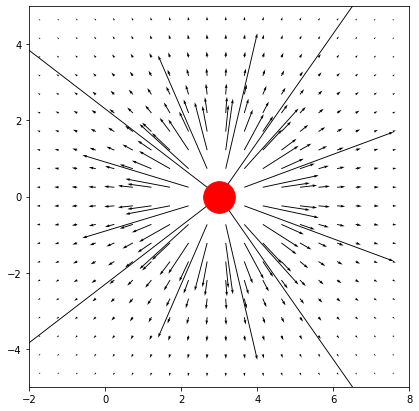

In [ ]:
#Probar que todo funciona en el paso 1.2
# Creamos una figura y eje con plt.subplots()
fig, ax = plt.subplots(figsize = (7,7))

# Agregamos al eje (ax) las flechas de los vectores con plt.quiver()
ax.quiver(X,Y,Ex,Ey)
# Dibujamos en el eje (ax) la carga puntual usando plt.scatter()
ax.scatter(initialX,initialY,c='red',s=1000)
#Configuramos las dimensiones del eje y el aspecto
ax.axis([initialX-5,initialX+5,initialY-5,initialY+5])
ax.set_aspect('equal','box')

#Paso 3

#Campo vectorial de 2+ partículas 

El campo eléctrico nos muestra cómo se comportaría una carga debido a la influencia de nuestra carga central en diveros puntos. Por tanto, un campo eléctrico con dos o más cargas nos demuestra cómo será el comportamiento entre éstas. 


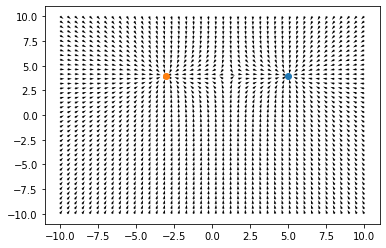

In [ ]:
def getElectricFieldComponents(charge, initialX, initialY):
  #Graficar partícula
  plt.plot(initialX, initialY, 'o')
  #radio
  radius = np.sqrt((X-initialX)**2 + (Y-initialY)**2)
  angles = np.arctan2(Y-initialY, X-initialX)
  #E
  E = k_e*(charge/radius**2)
  Ex = E*np.cos(angles)
  Ey = E*np.sin(angles)
  return [Ex, Ey]

particle1 = getElectricFieldComponents(-20*10**(-6), 5, 4)
particle2 = getElectricFieldComponents(-20*10**(-6), -3, 4)

sumElectricField = [
                  particle1[0]+particle2[0],
                  particle1[1]+particle2[1], 
                  
]  

magnitudeSumElectricField = np.sqrt(sumElectricField[0]**2 + sumElectricField[1]**2)

unitSumElectricField = [sumElectricField[0]/magnitudeSumElectricField, sumElectricField[1]/magnitudeSumElectricField]

plt.quiver(X, Y, unitSumElectricField[0], unitSumElectricField[1])



# Paso 4
## Creación de barras cargadas continuas
A modo de eficientar el proceso mencionado en el paso anterior, se creará una clase `Charge`

In [ ]:
class Charge:
  def __init__(self, charge, initialX, initialY, color):
    #Graficar partícula
    plt.plot(initialX, initialY, 'o', color = color)
    #radio
    radius = np.sqrt((X-initialX)**2 + (Y-initialY)**2)
    angles = np.arctan2(Y-initialY, X-initialX)
    #E
    E = k_e*(charge/radius**2)
    self.Ex = E*np.cos(angles)
    self.Ey = E*np.sin(angles)
    self.charge = charge
    self.position_x = initialX
    self.position_y = initialY
    self.color=color
  def plot(self):
    plt.plot(self.position_x, self.position_y, color=self.color)



Para generar una barra, utilizaremos la función `np.linespace()`

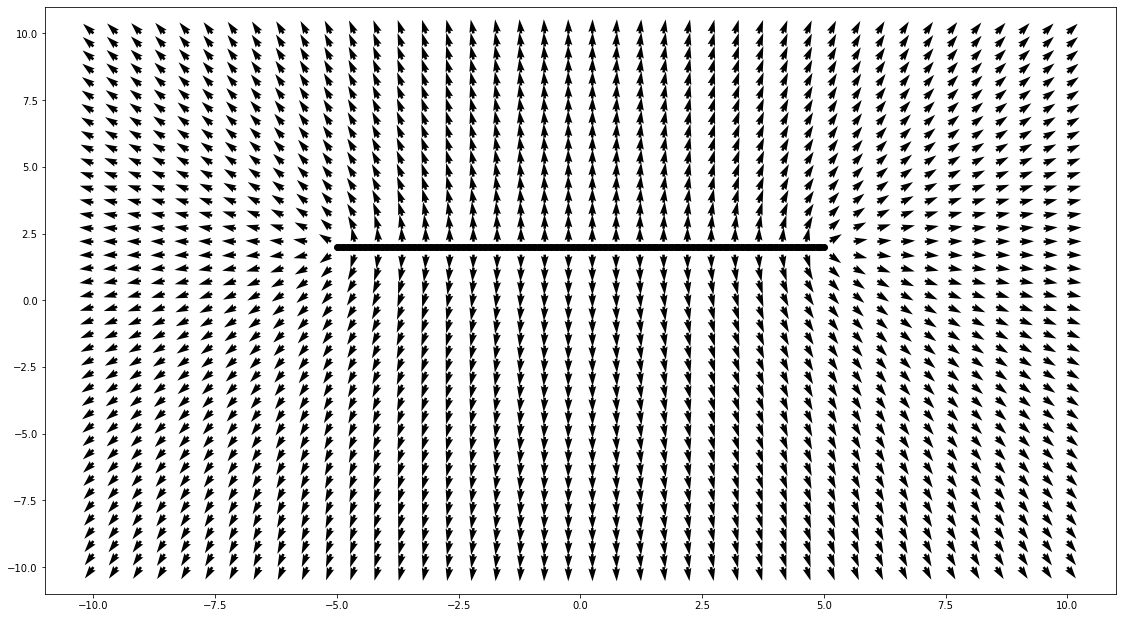

In [ ]:
barX = np.linspace(-5, 5, 200)

BarEx = 0
BarEy = 0
fig = plt.figure(figsize=(19.20,10.80))


for i in barX:
  q1 = Charge(20*10**(-6), i, 2, "k")
  BarEx+= q1.Ex
  BarEy+= q1.Ey

FinalMagnitud = np.sqrt(BarEx**2 + BarEy**2)

plt.quiver(X,Y, BarEx/FinalMagnitud, BarEy/FinalMagnitud)

Para hacer más modular lo anterior, podemos crear una clase de `ChargedBar`

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in multiply
  # This is added back by InteractiveShellApp.init_path()


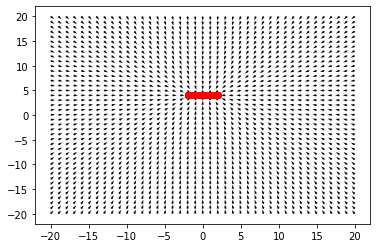

In [ ]:
class ChargedBar:
  def __init__(self, longitud, initialY, signo = "+", charge = 20*10**(-6), color = ""):
    #fig = plt.figure(figsize=(19.20,10.80))
    if signo in ["positivo","+"]:
        charge = 20*10**(-6)
        color = "g"
    else:
        charge = -20*10**(-6)
        color = "r"
    
    self.Ex = 0
    self.Ey = 0
    self.charge = 100*longitud

    if initialY > 0:
                            # Al ocupar "(2*longitud)*50", todas las barras van a tener la misma densidad de carga
        barX = np.linspace(-longitud, longitud, (2*longitud)*50)

        for i in barX:
            q1 = Charge(charge, i, initialY, color)
            self.Ex += q1.Ex
            self.Ey += q1.Ey
    else:
        barX = np.linspace(0, -longitud, (2*longitud)*50)

        for i in barX:
            q1 = Charge(charge, 0, i, color)
            self.Ex += q1.Ex
            self.Ey += q1.Ey
    
bar = ChargedBar(2, 4,"-")

FinalMagnitud = np.sqrt(bar.Ex**2 + bar.Ey**2)

plt.quiver(X,Y, bar.Ex/FinalMagnitud, bar.Ey/FinalMagnitud)

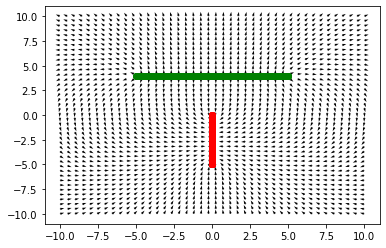

In [ ]:
#Creamos dos barras, en el mismo espacio

distanciaEntreBarras = 8

positiveBar = ChargedBar (5, distanciaEntreBarras/2)
negativeBar = ChargedBar (5, -distanciaEntreBarras/2, "-")

FinalEx= positiveBar.Ex + negativeBar.Ex
FinalEy= positiveBar.Ey + negativeBar.Ey

FinalMagnitud = np.sqrt(FinalEx**2 + FinalEy**2)

plt.quiver(X,Y,FinalEx/FinalMagnitud, FinalEy/FinalMagnitud)


##4.1. Creación de clase para sistema

In [ ]:
class ElectricFieldSum:
  def __init__(self):
    self.elements = []
    self.Ex = 0
    self.Ey = 0

  def addElements(self, elements):
    for i in elements:
      self.elements.append(i)
      self.Ex += i.Ex
      self.Ey += i.Ey
    return self

  def getElectricFieldAtCoords(self, _x, _y, direction):
    initial = (step-1)/2

    mid = int(np.round(step/2))

    deltaX = int(np.round(initial-_x+xMin))
    deltaY = int(np.round(initial-_y+yMin))
    
    plt.plot(X[ int(mid-_x) ][ int(mid-_x) ], Y[ int(mid-_y) ][ int(mid-_y) ], 'o')
    
    if(direction == "x" or direction == "X"):
      return self.Ex[ int(mid+_x) ][ int(mid+_x) ]
    elif(direction == "y" or direction == "Y"):
      return self.Ey[ int(mid+_y) ][ int(mid+_y) ]

  def overlayChargeAndForce(self, charges):
    for l in charges:
      self.Ex += l.Ex
      self.Ey += l.Ey
      Fx_onCharge = self.getElectricFieldAtCoords(l.position_x, l.position_y, "x")*l.charge
      Fy_onCharge = self.getElectricFieldAtCoords(l.position_x, l.position_y, "y")*l.charge
      F_onCharge = np.sqrt( Fx_onCharge**2 + Fy_onCharge**2 )
      print("La fuerza eléctrica en esta carga es de ", F_onCharge)
      plt.arrow(l.position_x, l.position_y, Fx_onCharge/F_onCharge, Fy_onCharge/F_onCharge, width=0.1, color=l.color)

  def getUnitVectors(self, direction):
    if(direction == "x" or direction == "X"):
      return self.Ex/np.sqrt(self.Ex**2 + self.Ey**2)
    elif(direction == "y" or direction == "Y"):
      return self.Ey/np.sqrt(self.Ex**2 + self.Ey**2)
    else:
      return 0
  def plot(self):
    #plt.axes().set_facecolor("#202020")
    plt.quiver(X, Y, self.getUnitVectors("x"), self.getUnitVectors("y"), width=0.0015, color='grey')

In [ ]:
class Dipol:
  def __init__(self, charge, _x, _y):
    q1 = Charge(charge, _x-0.1, _y)
    q2 = Charge(-charge, _x+0.1, _y)
    self.Ex = q1.Ex + q2.Ex
    self.Ey = q1.Ey + q2.Ey
    self.charge = charge


In [ ]:
class TwoBars:
  def __init__(self, longitud, distancia, q1, q2):
    barA = ChargedBar(longitud, distancia/2, q1)
    barB = ChargedBar(longitud, -distancia/2, q2)

    Ex= barA.Ex + barB.Ex
    Ey= barA.Ey + barB.Ey

    M = np.sqrt(Ex**2 + Ey**2)

    plt.quiver(X,Y,Ex/M, Ey/M)

##4.2. Análisis 

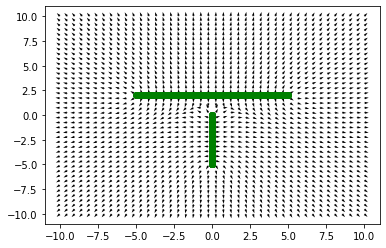

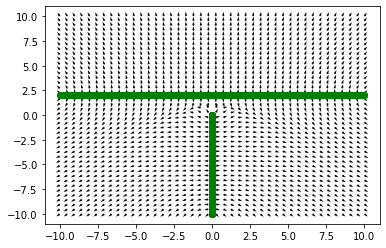

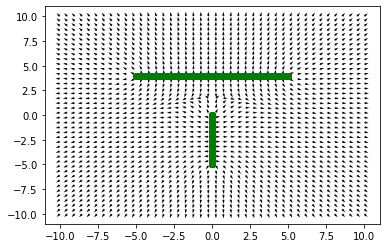

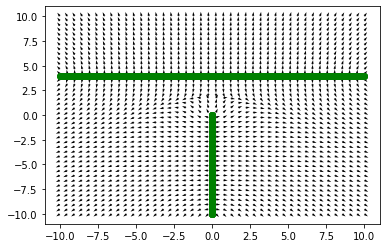

In [ ]:
# AMBAS POSITIVAS
plt.figure(1)
caso1_PP = TwoBars(5, 4, "+", "+")
plt.figure(2)
caso2_PP = TwoBars(10, 4, "+", "+")
plt.figure(3)
caso3_PP = TwoBars(5, 8, "+", "+")
plt.figure(4)
caso4_PP = TwoBars(10, 8, "+", "+")

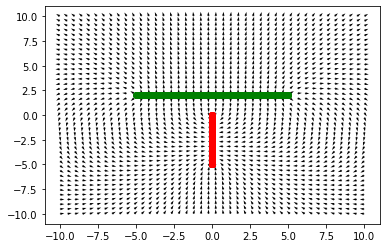

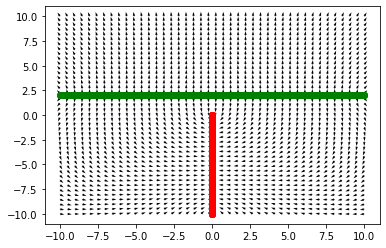

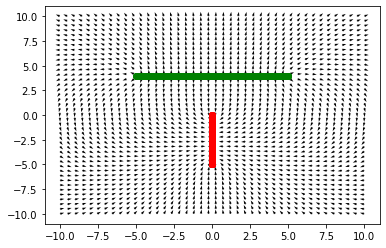

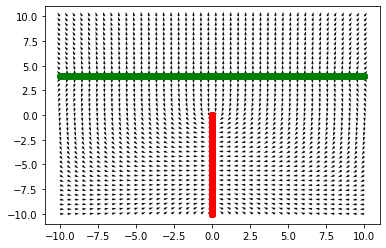

In [ ]:
# POSITIVA Y NEGATIVA
plt.figure(1)
caso1_PN = TwoBars(5, 4, "+", "-")
plt.figure(2)
caso2_PN = TwoBars(10, 4, "+", "-")
plt.figure(3)
caso3_PN = TwoBars(5, 8, "+", "-")
plt.figure(4)
caso4_PN = TwoBars(10, 8, "+", "-")

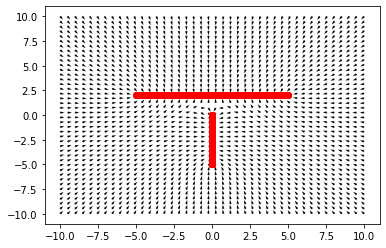

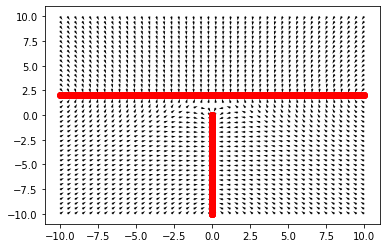

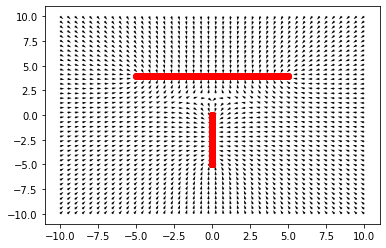

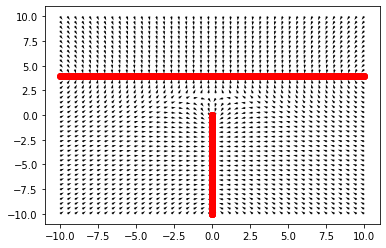

In [ ]:
# NEGATIVA Y NEGATIVA
plt.figure(1)
caso1_NN = TwoBars(5, 4, "-", "-")
plt.figure(2)
caso2_NN = TwoBars(10, 4, "-", "-")
plt.figure(3)
caso3_NN = TwoBars(5, 8, "-", "-")
plt.figure(4)
caso4_NN = TwoBars(10, 8, "-", "-")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in multiply
  # This is added back by InteractiveShellApp.init_path()


La fuerza eléctrica en esta carga es de  inf
La fuerza eléctrica en esta carga es de  inf


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars


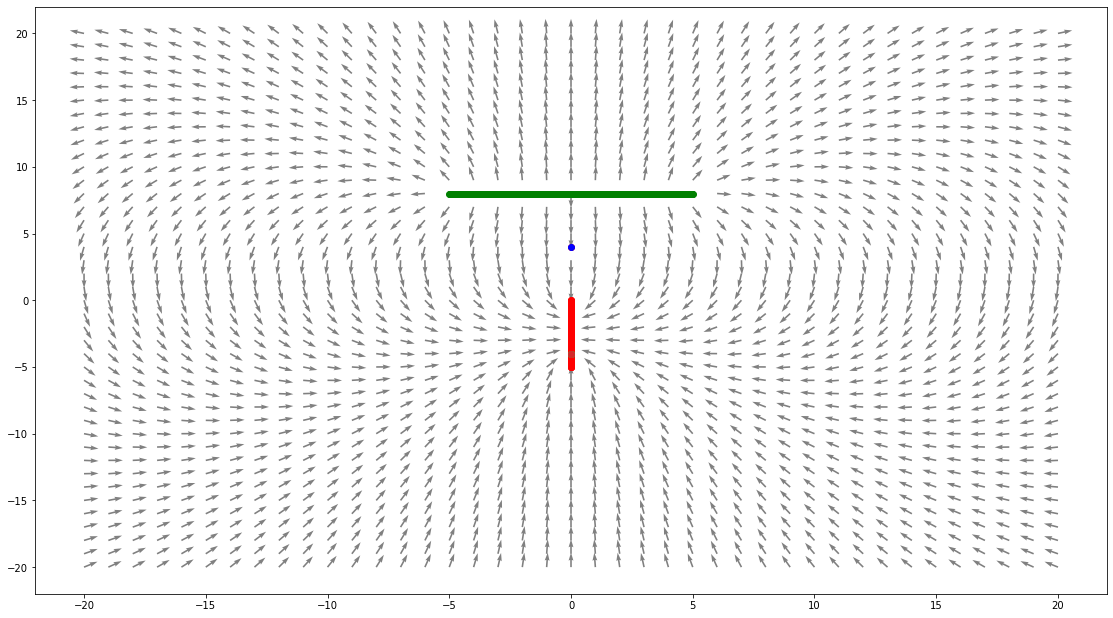

In [ ]:
fig = plt.figure(figsize=(19.20,10.80))
# plt.axes().tick_params(axis='x', colors='white')
# plt.axes().tick_params(axis='y', colors='white')
# plt.axes().spines['bottom'].set_color('w')
# plt.axes().spines['top'].set_color('w')
# plt.axes().spines['left'].set_color('w')
# plt.axes().spines['right'].set_color('w')

distanciaEntreBarras = 8

positiveBar = ChargedBar (5, distanciaEntreBarras)
negativeBar = ChargedBar (5, -2, "-")

dipolPos = Charge(100*10**(-6), 0, distanciaEntreBarras/2, "r")
dipolNeg = Charge(-100*10**(-6), 0, distanciaEntreBarras/2-0.001, "b")

electricSystem = ElectricFieldSum()
electricSystem.addElements([
                            positiveBar, 
                            negativeBar, 
])
electricSystem.overlayChargeAndForce([
                                      dipolPos, 
                                      dipolNeg
])


electricSystem.plot()

